## Import Libararies

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib

## Load and Prepare Dataset

In [37]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Visualize Class Imbalance

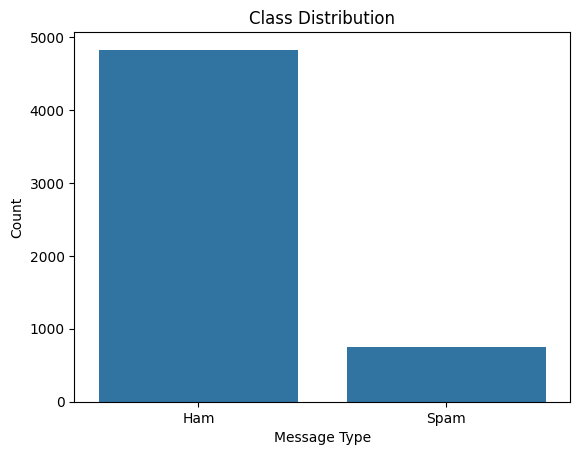

In [38]:
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Class Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


## Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)


## TF-IDF + SMOTE + RandomForest + GridSearchCV Pipeline

In [40]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

pipeline = ImbPipeline([
    ('tfidf', tfidf),
    ('smote', SMOTE(random_state=42)),
    ('clf', rf)
])

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)


## Fit the Model

In [41]:
grid.fit(X_train, y_train)
print(f"\n✅ Best Parameters: {grid.best_params_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Parameters: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


## Evaluate Performance

In [42]:
y_pred = grid.predict(X_test)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


📊 Classification Report:

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       966
        Spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Confusion Matrix

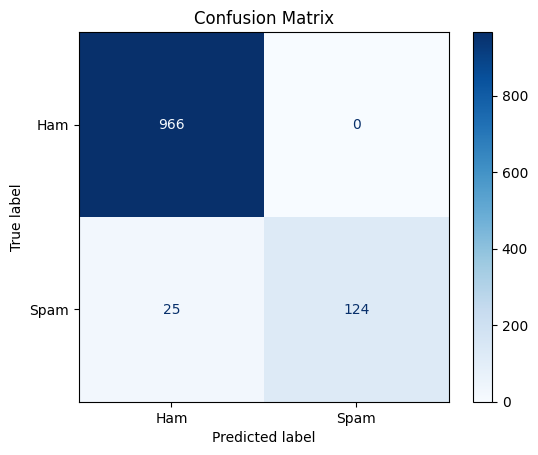

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Save Model & Vectorizer

In [44]:
joblib.dump(grid.best_estimator_, 'spam_model.pkl')
joblib.dump(grid.best_estimator_.named_steps['tfidf'], 'vectorizer.pkl')


['vectorizer.pkl']